# **Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense, Flatten
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report

import warnings
warnings.filterwarnings("ignore")

2025-04-16 21:14:38.796066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744838078.980345      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744838079.034663      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Load the Dataset**

In [2]:
iris = load_iris()
# x = iris.data
# y = iris.target

# **Understand the Dataset**

In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

* ***In the iris dataset that we loaded from the sklearn library, the target column is a numeric column. Like 0, 1, 2.***
* ***But when we do exploratory data analysis, we may not fully understand which value is equal to what.***
* ***That's why we created a column called species and wrote in this column the exact species that the species in the iris dataset rows belong to, along with the species names.***

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


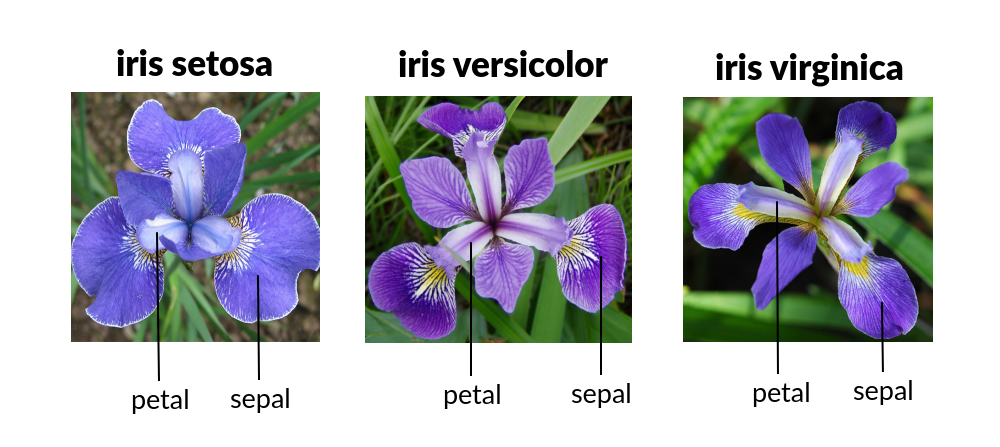

* ***Let's understand the dataset better using this image.***
* ***There are 5 column-features in the dataset and 1 column-feature that we created, for a total of 6 column-features. These features are sepal length and width, petal length and width, target and species. Using the image above, you can understand exactly what sepal, petal and species mean.***

In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# **EDA (Exploratory Data Analysis)**

***Let's use appropriate colors for the data set***

In [9]:
colors = ['#7E57C2', '#4DB6AC', '#303F9F']
palette = dict(zip(iris.target_names, colors))

##  **Pairplots**

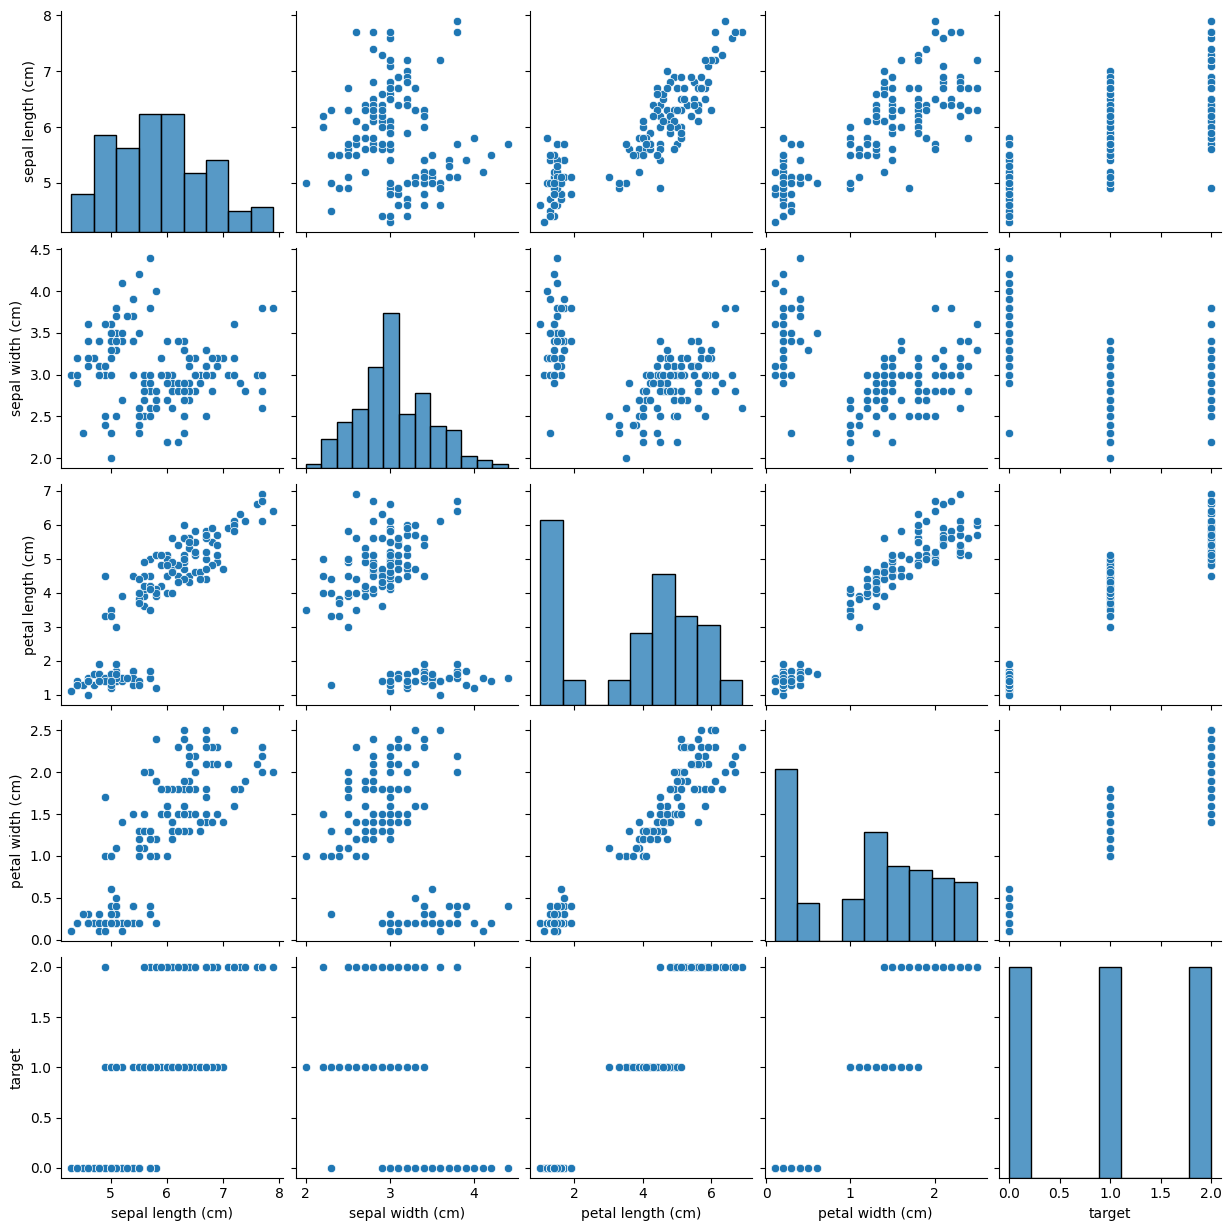

In [10]:
sns.pairplot(df);

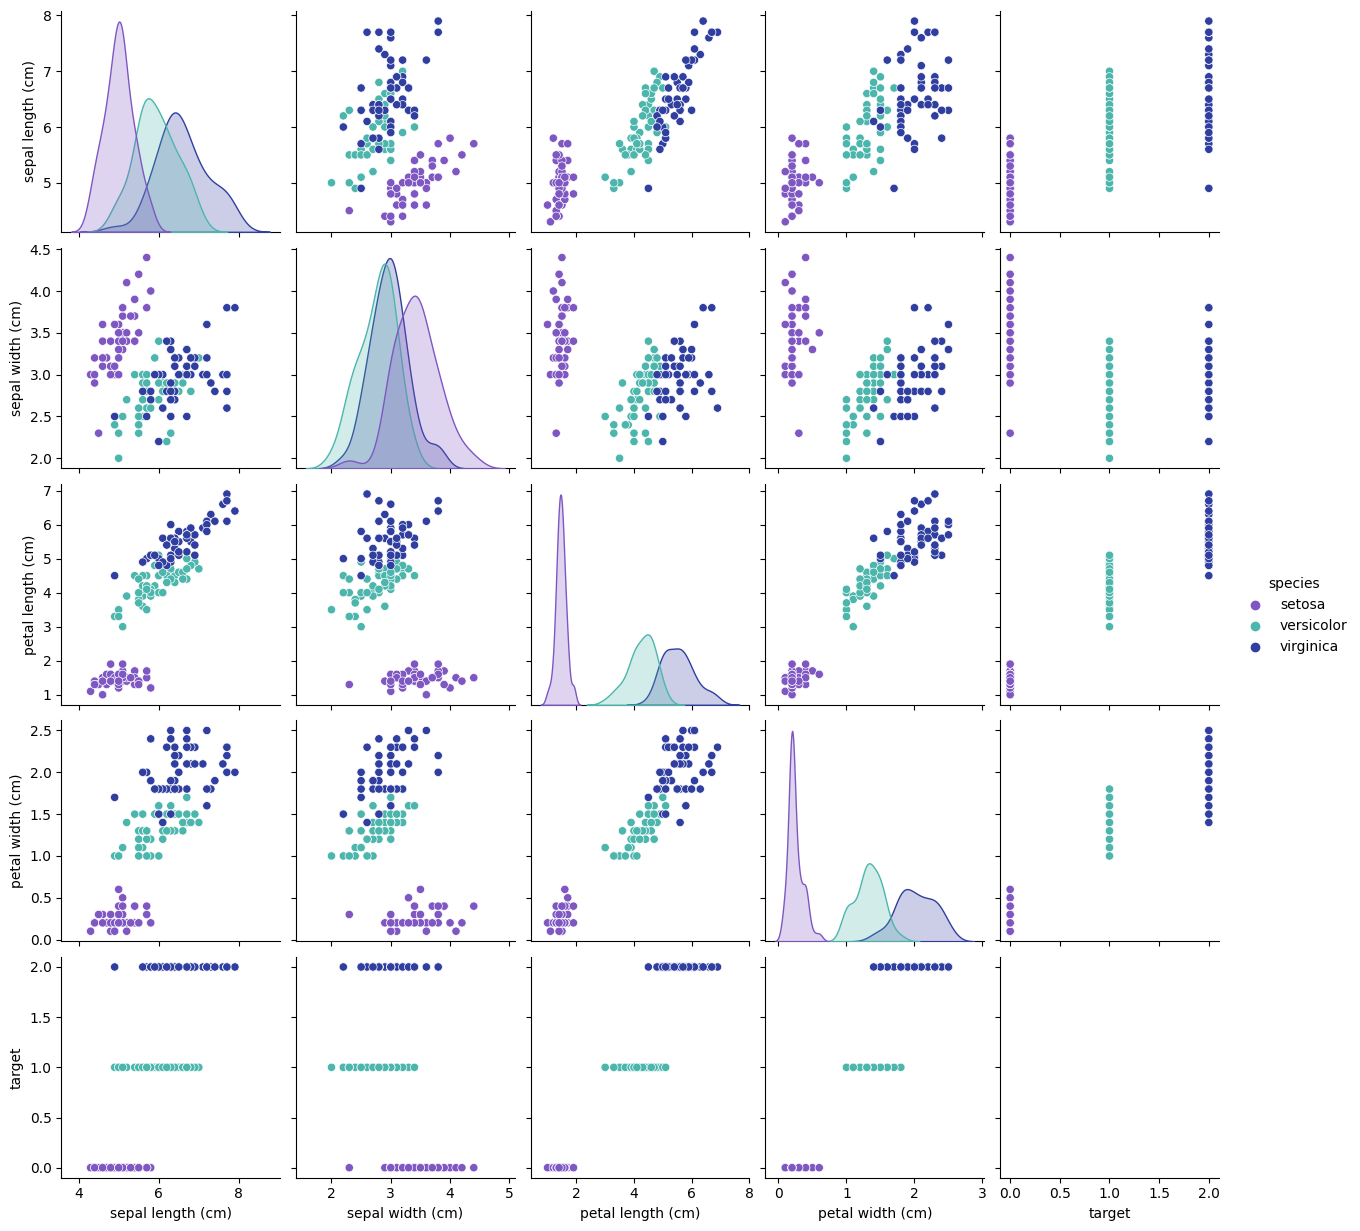

In [11]:
sns.pairplot(df, hue='species', palette=palette);

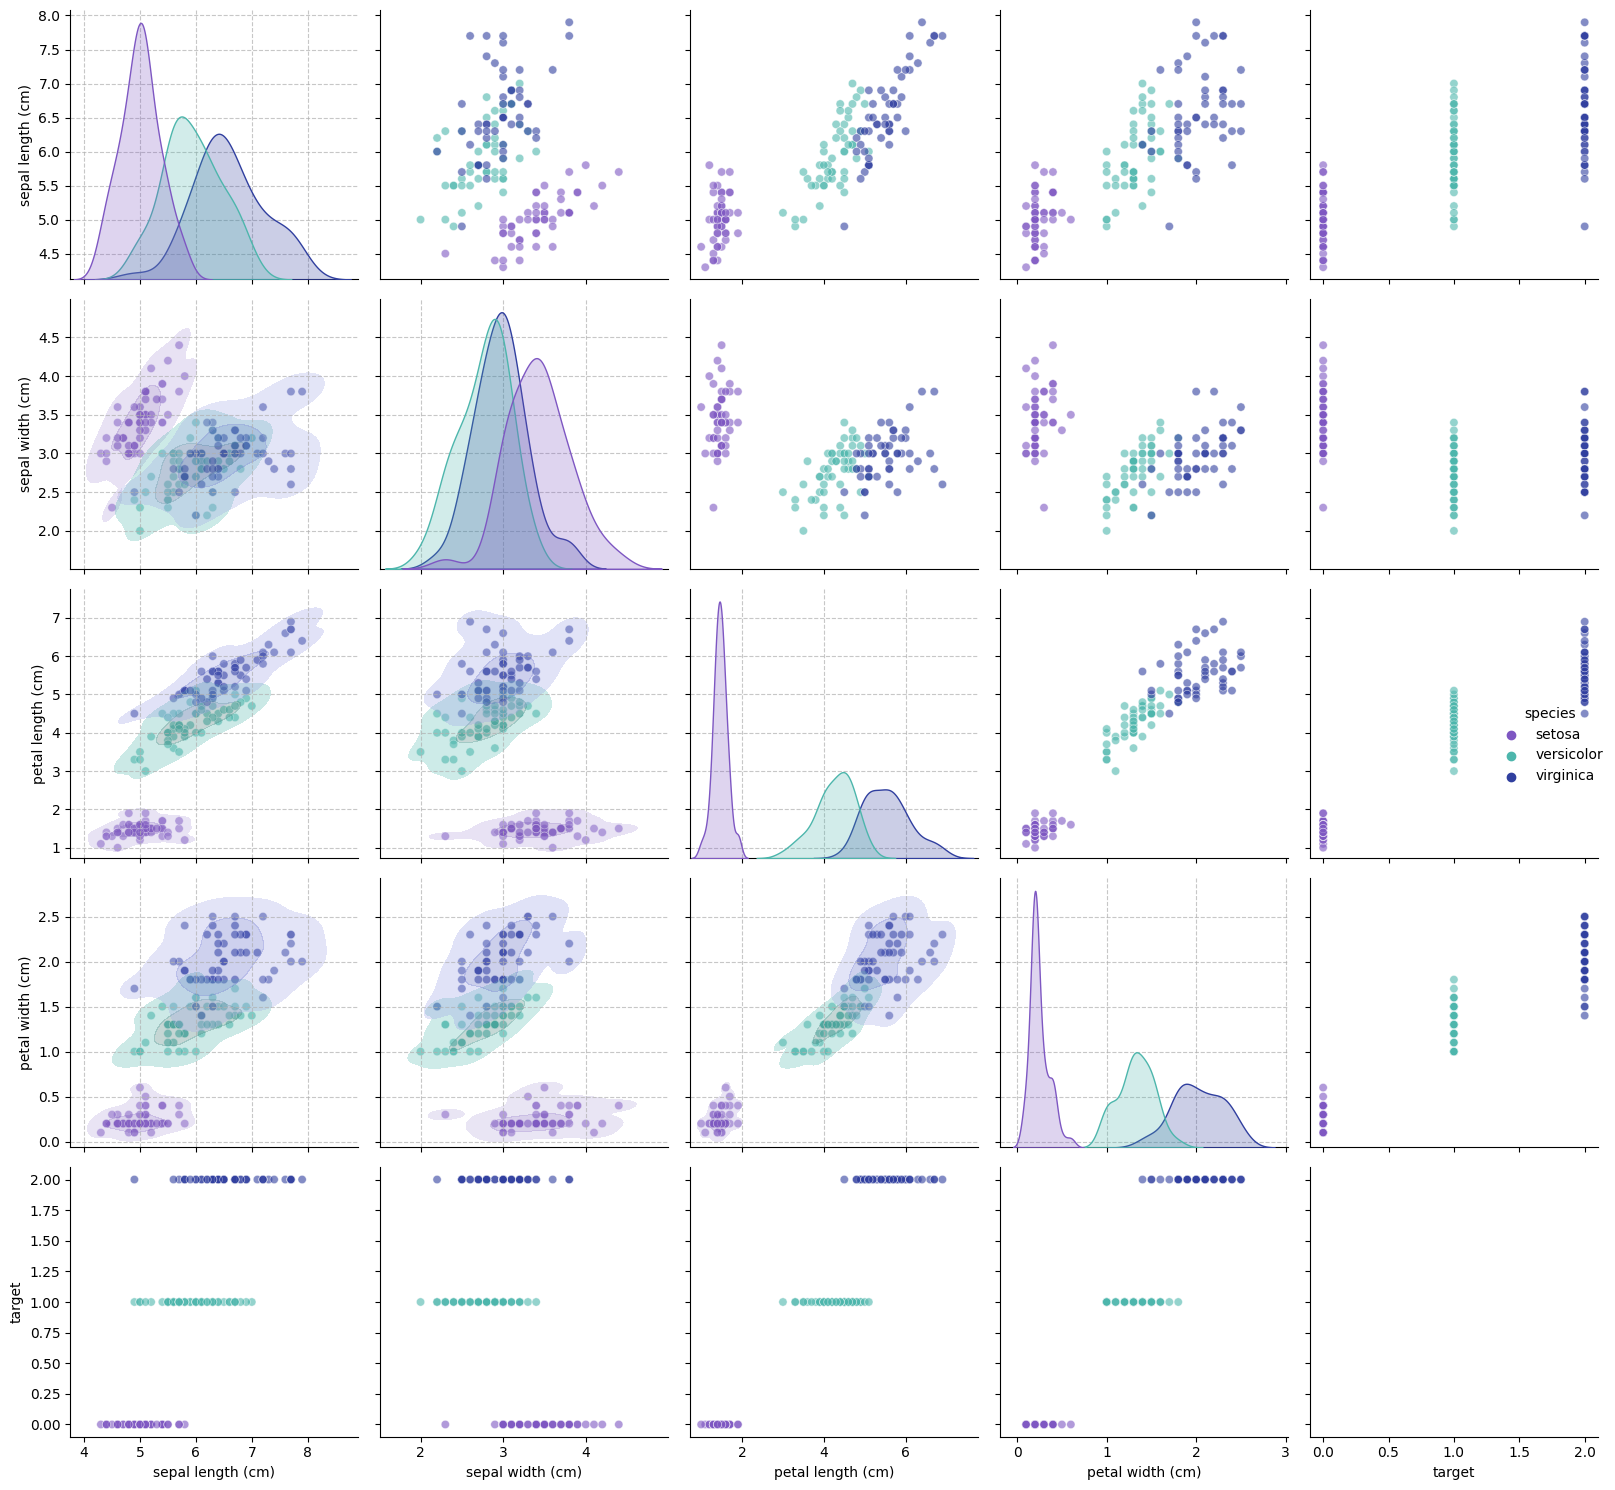

In [12]:
g = sns.pairplot(
    data=df,
    hue='species',
    # corner=True,
    height=3,
    diag_kind='kde',
    palette=palette,
    plot_kws={'alpha': 0.6}
)

for i in range(len(df.columns)-2):
    for j in range(len(df.columns)-2):
        if i > j:
            ax = g.axes[i, j]
            ax.grid(True, linestyle='--', alpha=0.7)
            for idx, target in enumerate(df['species'].unique()):
                subset = df[df['species'] == target]
                sns.kdeplot(
                    data=subset,
                    x=df.columns[j],
                    y=df.columns[i],
                    ax=ax,
                    levels=3,
                    alpha=0.3,
                    fill=True,
                    color=colors[idx]
                )
        

        if i == j and i < len(df.columns)-2:
            g.axes[i, i].grid(True, linestyle='--', alpha=0.7)          

plt.tight_layout()
plt.show()

##  **Box Plots**

###   **By Species**

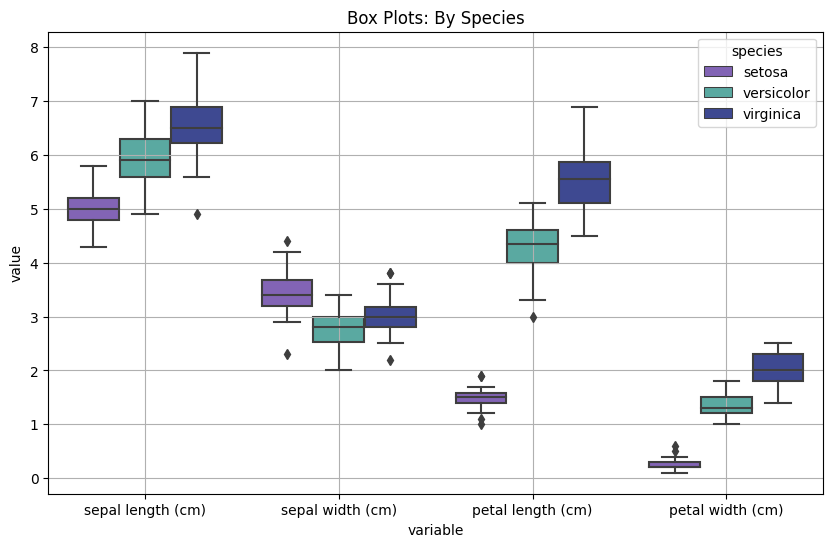

In [13]:
plt.figure(figsize=(10,6))
df_melted = df.melt(id_vars=['species'], value_vars=iris.feature_names)
sns.boxplot(x='variable', y='value', data=df_melted, hue='species', palette=palette)
plt.title('Box Plots: By Species')
plt.grid()
plt.show()

###   **By Features**

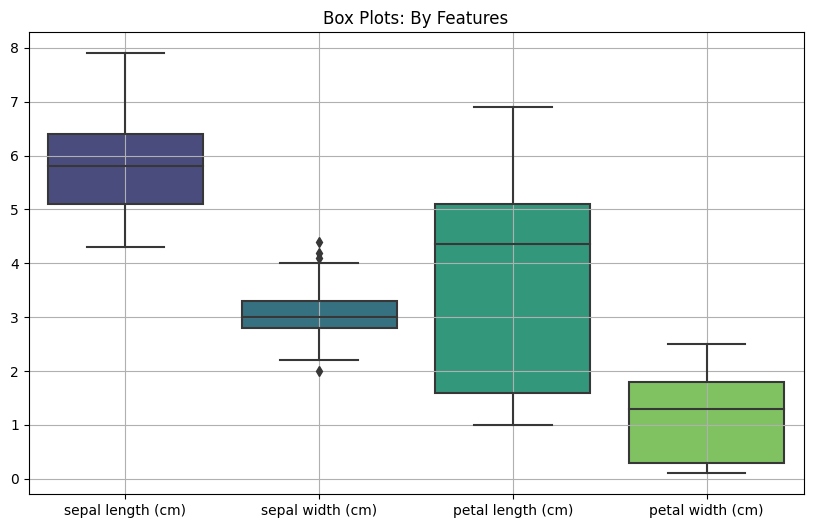

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.iloc[:, :4], palette='viridis')
plt.title('Box Plots: By Features')
plt.grid()
plt.show()

## **Iris Dataset Features - Histogram Comparison**  

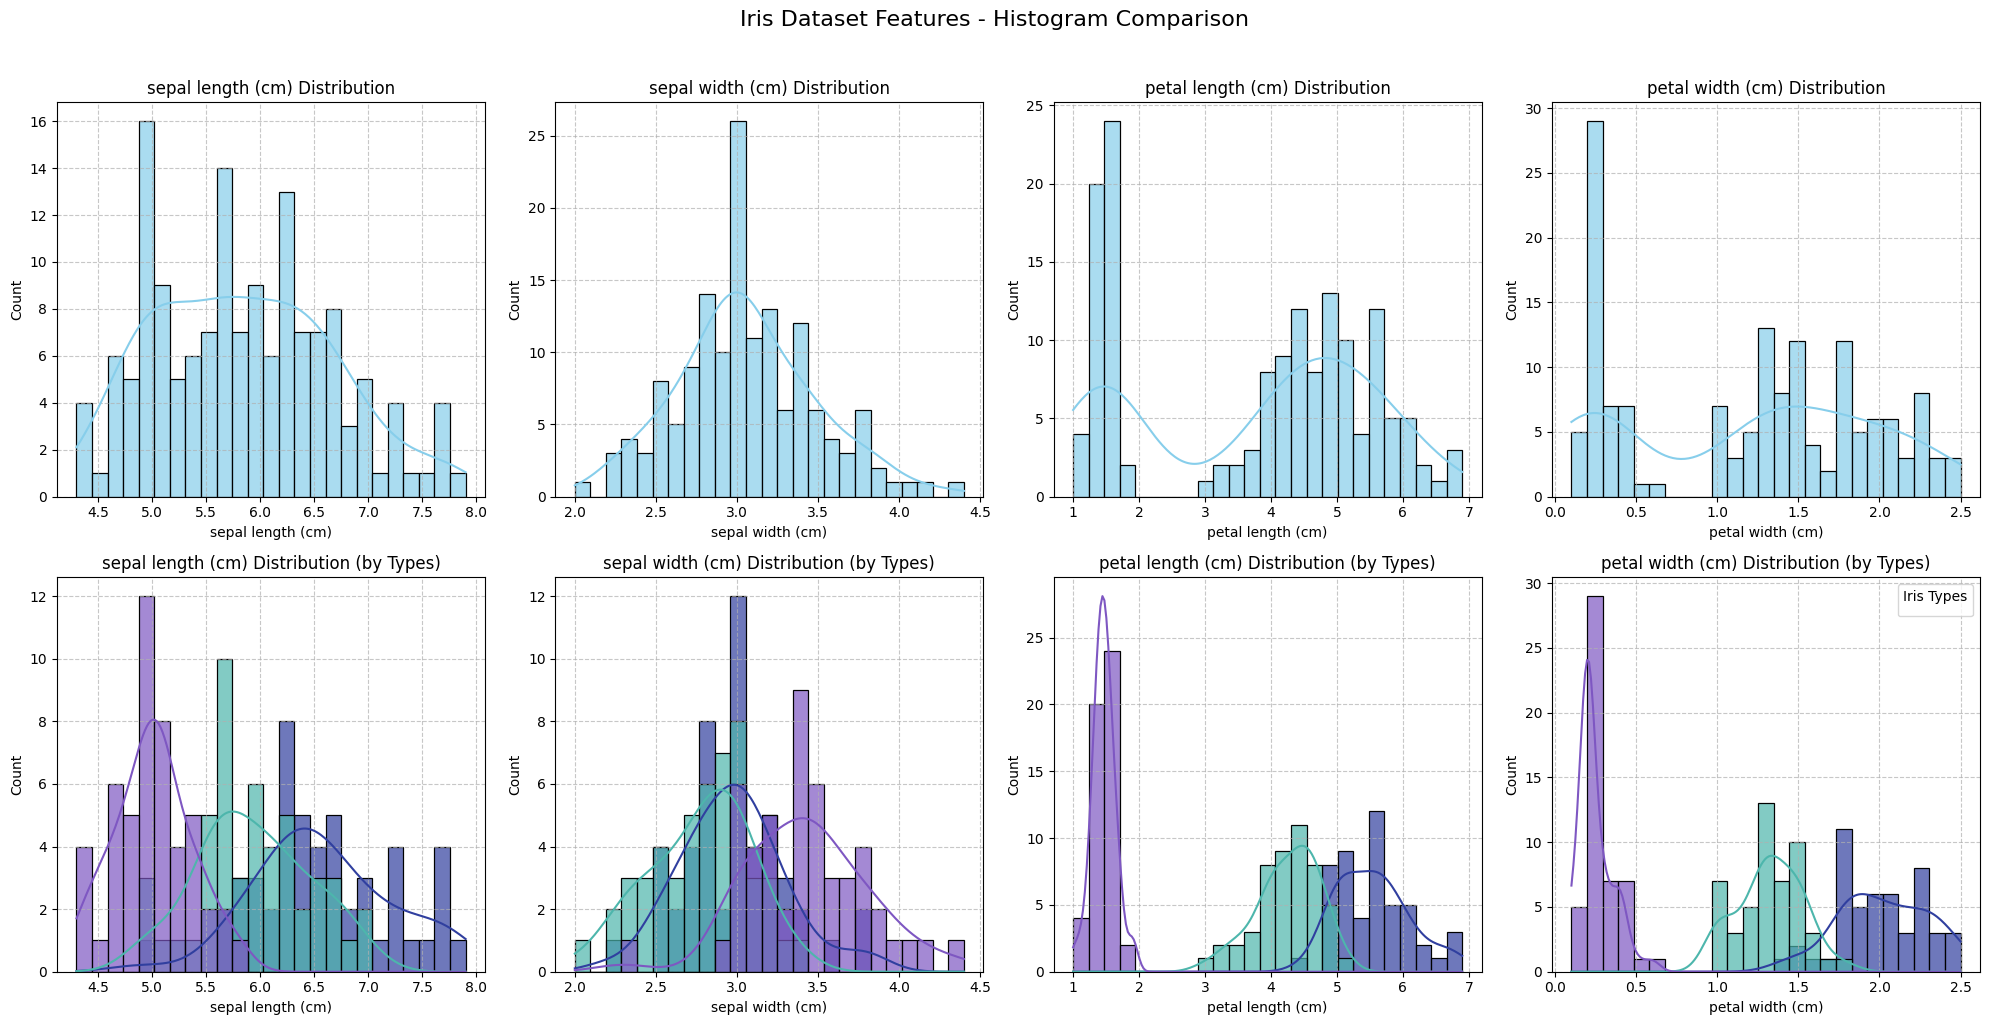

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Iris Dataset Features - Histogram Comparison', size=16, y=1.02)

for idx, feature in enumerate(iris.feature_names):
    sns.histplot(
        data=df,
        kde=True,
        x=feature,
        bins=25,
        ax=axes[0, idx],
        color='skyblue',
        edgecolor='black',
        alpha=0.7
    )
    axes[0, idx].grid(True, linestyle='--', alpha=0.7)
    axes[0, idx].set_title(f'{feature} Distribution')

for idx, feature in enumerate(iris.feature_names):
    sns.histplot(
        data=df,
        kde=True,
        x=feature,
        hue='species',
        bins=25,
        ax=axes[1, idx],
        palette=palette,
        alpha=0.7,
        multiple="layer"
    )
    axes[1, idx].grid(True, linestyle='--', alpha=0.7)
    axes[1, idx].set_title(f'{feature} Distribution (by Types)')
    if idx == 3:
        axes[1, idx].legend(title='Iris Types')
    else:
        axes[1, idx].get_legend().remove()

plt.tight_layout()
plt.show()

## **jointplots**

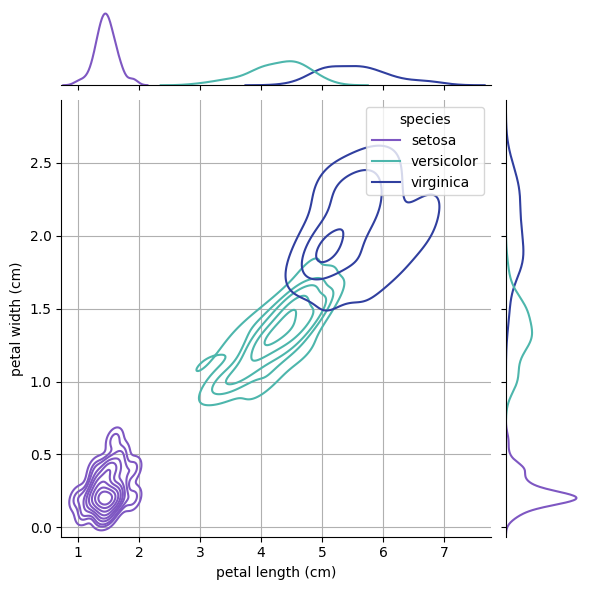

In [16]:
sns.jointplot(x="petal length (cm)", y="petal width (cm)", hue = 'species', data=df, kind="kde", palette=palette)
plt.grid()
plt.show()

<Figure size 1000x800 with 0 Axes>

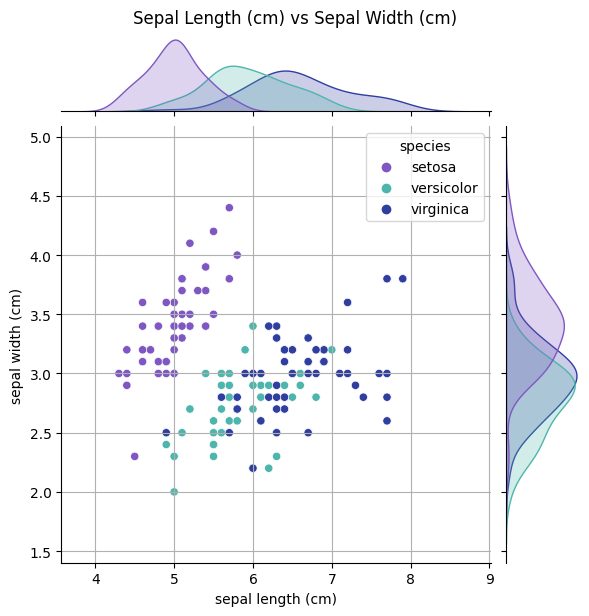

In [17]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=df, x='sepal length (cm)', y='sepal width (cm)', 
              hue='species', kind='scatter', palette=palette)
plt.suptitle('Sepal Length (cm) vs Sepal Width (cm)', y=1.02)
plt.grid()
plt.show()

<Figure size 1000x800 with 0 Axes>

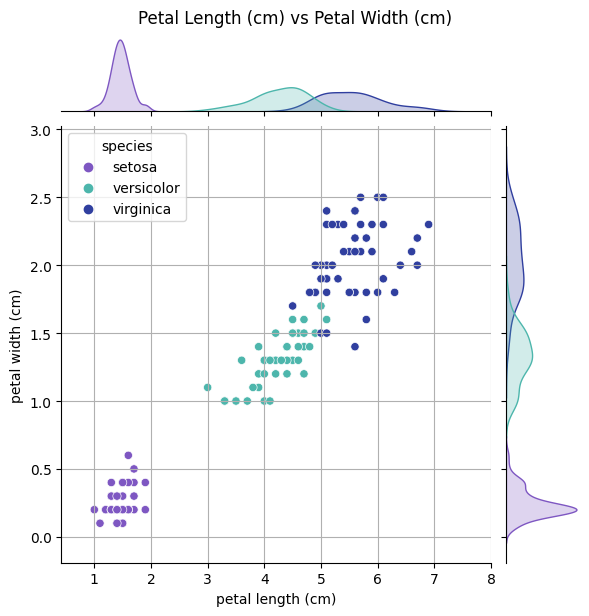

In [18]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=df, x='petal length (cm)', y='petal width (cm)', 
              hue='species', kind='scatter', palette=palette)
plt.suptitle('Petal Length (cm) vs Petal Width (cm)', y=1.02)
plt.grid()
plt.show()

## **Correlation Heatmap**  

In [19]:
numeric_df = df.select_dtypes(include=['number'])

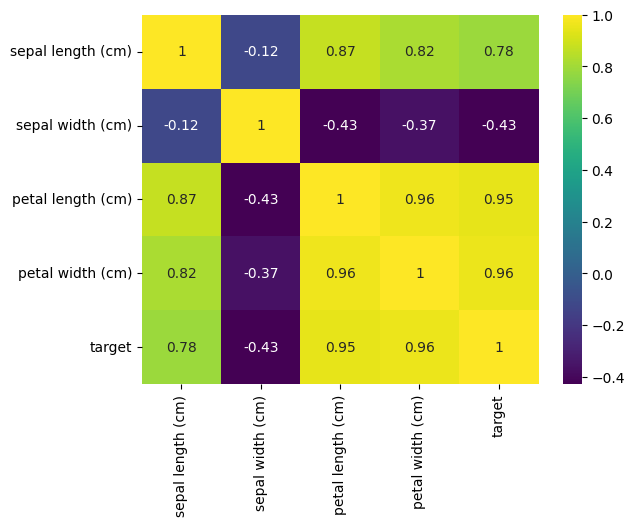

In [20]:
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

# **Preprocessing**

In [21]:
x = iris.data
y = iris.target

In [22]:
print('First 5 rows of x:\n', x[:5])
print('\nx.shape:', x.shape)
print('\nFirst 5 rows of y:\n', y[:5])
print('\ny.shape:', y.shape)

First 5 rows of x:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

x.shape: (150, 4)

First 5 rows of y:
 [0 0 0 0 0]

y.shape: (150,)


## **Label Binarization**

***LabelBinarizer converts text or category labels into numerical form, expressed as 0s and 1s, that AI models can understand. It is especially useful for classification problems.***

***Sample Output;***

***Original Labels:  ['setosa', 'versicolor', 'virginica', 'versicolor', 'setosa']***

***Binarized Labels:***

 ***[[1 0 0] --> setosa***
 
 ***[0 1 0] --> versicolor***
  
***[0 0 1] --> virginica***
  
  ***[0 1 0] --> versicolor***
  
  ***[1 0 0]]--> setosa***

In [23]:
label_binarizer = LabelBinarizer()
y_encoded = label_binarizer.fit_transform(y)

In [24]:
print('Difference Between y And y_encoded After Using Label Binarizer\n')
print('y: \n', y[0:5])
print('\ny_encoded:\n', y_encoded[:5])
print('\ny shape:', y.shape)
print('\ny_encoded shape:',y_encoded.shape)

Difference Between y And y_encoded After Using Label Binarizer

y: 
 [0 0 0 0 0]

y_encoded:
 [[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]

y shape: (150,)

y_encoded shape: (150, 3)


##  **Scaling**

***StandardScaler enables machine learning algorithms to work more accurately and faster by setting the mean of the data to 0 and the standard deviation to 1.***

In [25]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [26]:
print('Difference Between x And x_scaled After Using Standard Scaler\n')
print('x: \n', x[0:5])
print('\nx_scaled:\n', x_scaled[:5])

Difference Between x And x_scaled After Using Standard Scaler

x: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

x_scaled:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


# **Model Building** 

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, train_size=0.8, random_state=42)

In [28]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (120, 4)
x_test shape: (30, 4)
y_train shape: (120, 3)
y_test shape: (30, 3)


***What is RBFN and RBF Layer?***

***RBFN (Radial Basis Function Network) is a classic artificial neural network model, but the difference is:***

* ***It uses Radial Basis Function (RBF) in its hidden layer.***

* ***It is especially used in pattern recognition, function approximation, regression and classification problems.***

***RBF Layer does the following:***

* ***Processes the input according to its distance from the center points.***

* ***Uses radial-based functions such as Gaussian, Multiquadric or Inverse Quadric as activation functions.***

* ***It is mostly useful for pattern recognition and function approximation problems.***

***So Why Isn't There a Ready RBF Layer?***

* ***RBF Layer is a "special case" layer and varies according to each person's needs. That's why frameworks expect you to write it by hand instead of providing it ready-made.***

* ***That's why we will code our RBF Layer ourselves using the class.***

In [29]:
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu', shape=(int(input_shape[1]), self.units),
                                                   initializer = "uniform", trainable = True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis = 1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_out_shape(self, input_shape):
        return (input_shape[0], self.units)

In [30]:
def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(4,)))
    model.add(RBFLayer(10, 0.5))
    model.add(Dense(3, activation = "softmax"))

    model.compile(optimizer = "adam", metrics = ["accuracy"],
                 loss = "categorical_crossentropy")
    return model

## **EarlyStopping**

In [31]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5, 
    restore_best_weights=True,
    verbose=1
)

In [32]:
model = build_model()

I0000 00:00:1744838120.220471      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [33]:
history = model.fit(
    x_train, y_train,
    epochs=300,
    batch_size=4,
    validation_split=0.3,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/300


I0000 00:00:1744838122.440058      62 service.cc:148] XLA service 0x7dae500024b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744838122.440564      62 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1744838122.586815      62 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5000 - loss: 1.0977

I0000 00:00:1744838122.904200      62 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4485 - loss: 1.1809 - val_accuracy: 0.2222 - val_loss: 1.2070
Epoch 2/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4003 - loss: 1.1650 - val_accuracy: 0.2222 - val_loss: 1.1500
Epoch 3/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4030 - loss: 1.1178 - val_accuracy: 0.3056 - val_loss: 1.1019
Epoch 4/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6060 - loss: 1.0555 - val_accuracy: 0.5833 - val_loss: 1.0598
Epoch 5/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5976 - loss: 1.0972 - val_accuracy: 0.6111 - val_loss: 1.0268
Epoch 6/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6496 - loss: 1.0587 - val_accuracy: 0.6111 - val_loss: 0.9978
Epoch 7/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6346 - loss: 1.0453 - val_accuracy: 0.6111 - val_loss: 0.9704
Epoch 8/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6297 - loss: 1.0493 - val_accuracy: 0.6667 - val_loss: 0.

# **Results of the Model**

In [34]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 1.0000
Test Loss: 0.0962


##   **Visualization of the Model's Results**

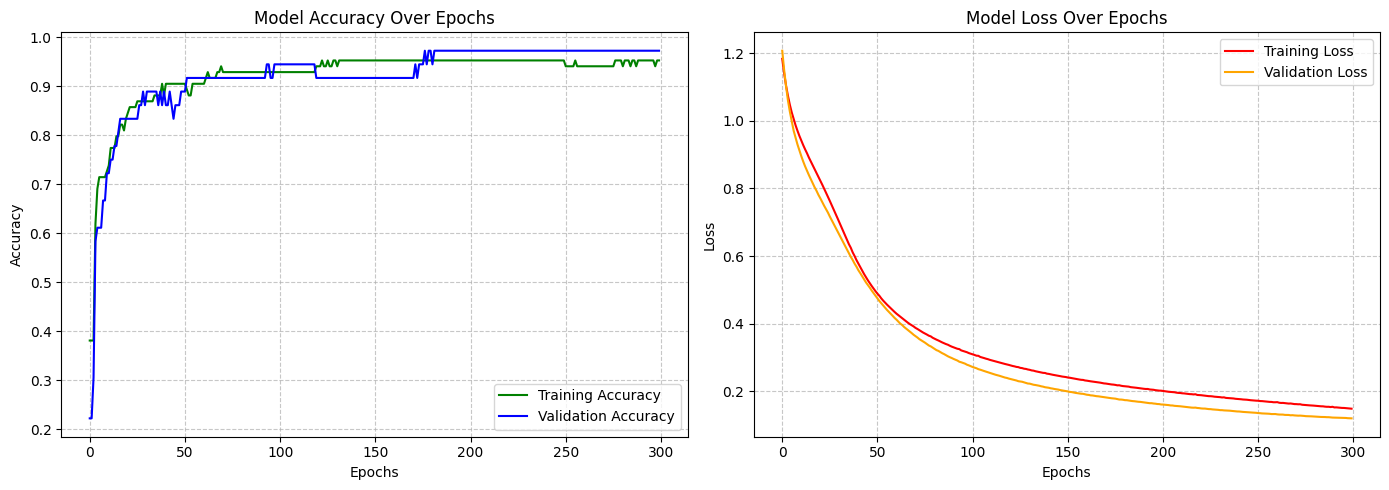

In [35]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Model Accuracy Over Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Model Loss Over Epochs')

plt.tight_layout()
plt.show()

###   **Confusion Matrix**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


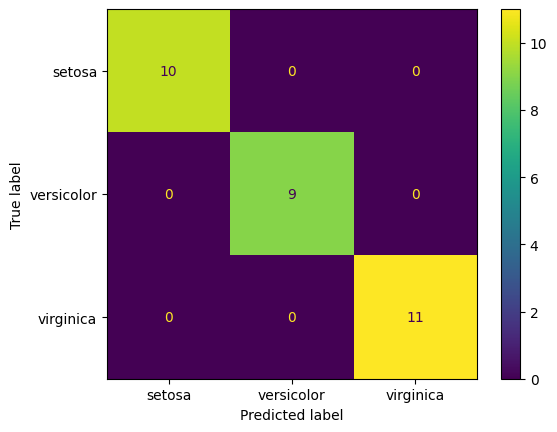

In [36]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='viridis')
plt.grid(False)
plt.show()


###   **ROC Curves**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


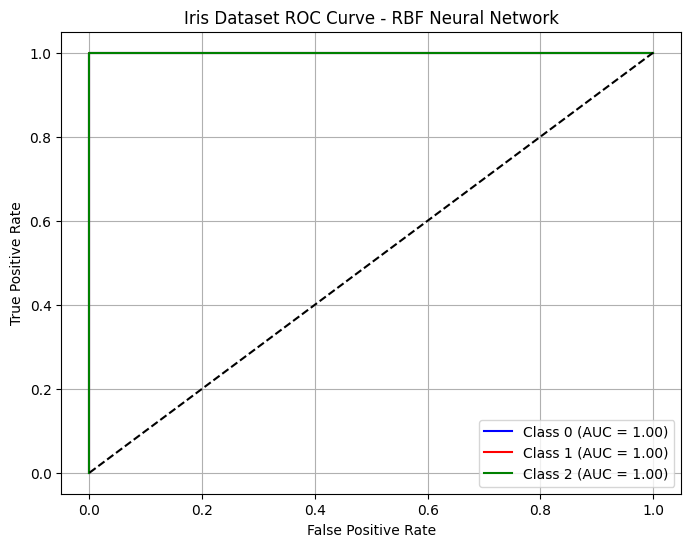

In [37]:
y_pred_proba = model.predict(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_encoded.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Iris Dataset ROC Curve - RBF Neural Network')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [38]:
y_test = y_test.ravel() 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


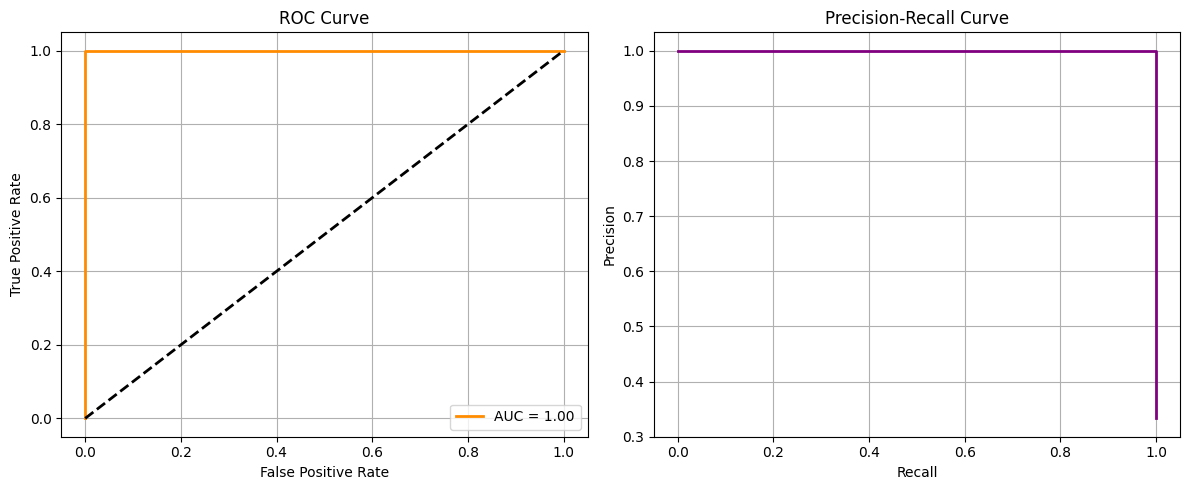

In [39]:
y_pred_proba = model.predict(x_test).ravel()
y_pred_class = (y_pred_proba >= 0.5).astype(int)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.subplot(1,2,2)
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

plt.tight_layout()
plt.show()

##  **Classification Report** 

In [40]:
print("\n🧾 Classification Report:\n")
print(classification_report(y_test, y_pred_class))


🧾 Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.97      0.98        30

    accuracy                           0.99        90
   macro avg       0.99      0.98      0.99        90
weighted avg       0.99      0.99      0.99        90

